# Detecting Malaria using convolutional neural network


The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

to download the dataset and to know more about it click [here](https://lhncbc.nlm.nih.gov/publication/pub9932)




In [1]:
#importing libraries

import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# initialising the CNN
classifier = Sequential()

W1222 17:51:49.588919  5652 deprecation_wrapper.py:119] From C:\Users\user\.conda\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [3]:
#step 1 Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape= (64, 64, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

#2nd layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

#step 3 - Flattening
classifier.add(Flatten())

#step-4 Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))


W1222 17:51:50.672018  5652 deprecation_wrapper.py:119] From C:\Users\user\.conda\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1222 17:51:51.471877  5652 deprecation_wrapper.py:119] From C:\Users\user\.conda\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1222 17:51:53.320929  5652 deprecation_wrapper.py:119] From C:\Users\user\.conda\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [4]:
# compile the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

W1222 17:51:53.725846  5652 deprecation_wrapper.py:119] From C:\Users\user\.conda\envs\DL\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1222 17:51:53.807626  5652 deprecation_wrapper.py:119] From C:\Users\user\.conda\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1222 17:51:53.931297  5652 deprecation.py:323] From C:\Users\user\.conda\envs\DL\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory('cell_images/train',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 22046 images belonging to 2 classes.


In [7]:
test_set = test_datagen.flow_from_directory('cell_images/valid',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 5512 images belonging to 2 classes.


In [8]:
classifier.fit_generator(training_set,
                        samples_per_epoch = 8000,
                        nb_epoch = 25,
                        validation_data = test_set,
                        nb_val_samples = 2000)

W1222 17:52:01.757350  5652 deprecation_wrapper.py:119] From C:\Users\user\.conda\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/25
250/250 [==============================] - 773s 3s/step - loss: 0.6885 - acc: 0.5444 - val_loss: 0.6659 - val_acc: 0.5917
Epoch 2/25
250/250 [==============================] - 198s 792ms/step - loss: 0.6659 - acc: 0.5945 - val_loss: 0.6292 - val_acc: 0.6337
Epoch 3/25
250/250 [==============================] - 225s 902ms/step - loss: 0.6354 - acc: 0.6393 - val_loss: 0.5512 - val_acc: 0.7282
Epoch 4/25
250/250 [==============================] - 111s 446ms/step - loss: 0.5747 - acc: 0.7047 - val_loss: 0.4897 - val_acc: 0.7715
Epoch 5/25
250/250 [==============================] - 199s 797ms/step - loss: 0.4105 - acc: 0.8174 - val_loss: 0.2660 - val_acc: 0.9119
Epoch 6/25
250/250 [==============================] - 102s 407ms/step - loss: 0.2593 - acc: 0.9024 - val_loss: 0.1917 - val_acc: 0.9334
Epoch 7/25
250/250 [==============================] - 119s 477ms/step - loss: 0.2219 - acc: 0.9196 - val_loss: 0.1612 - val_acc: 0.9462
Epoch 8/25
250/250 [==============================]

Infected **


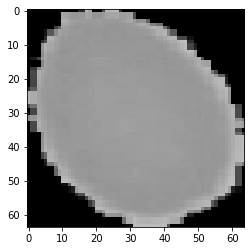

In [16]:
from matplotlib import pyplot as plt
#test a new single image
test_image1= image.load_img('cell_images/random1.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Infected **


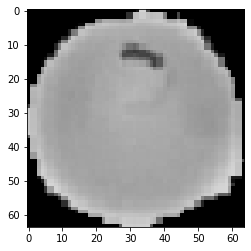

In [10]:
#test a new single image
test_image1= image.load_img('cell_images/random2.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Not infected


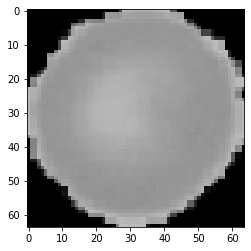

In [11]:
#test a new single image
test_image1= image.load_img('cell_images/random3.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Infected **


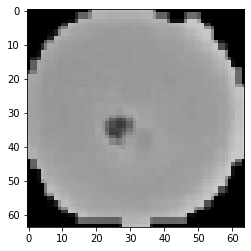

In [12]:
#test a new single image
test_image1= image.load_img('cell_images/random4.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Infected **


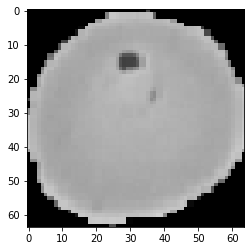

In [13]:
#test a new single image
test_image1= image.load_img('cell_images/random5.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)